Import Libraries to be used

In [1]:
import pandas as peacepd
import seaborn as peacesns
import numpy as peacenp
import matplotlib.pyplot as peaceplt
import statsmodels.api as peacestats
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**QUESTION 3 - DIABETES DATA**

In [2]:
df_diabetes = peacepd.read_excel('Diabetes_Data.xlsx')
df_diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
df_diabetes.shape

(442, 11)

In [4]:
df_diabetes.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


**3.1 Produce a correlation matrix of the explanatory variables and make an heatmap of the matrix**

In [5]:
# Calculate the correlation matrix
df_diabetes_explanatory = df_diabetes.drop(columns=['Y'])

correlation_matrix = df_diabetes_explanatory.corr()
print(correlation_matrix)

          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           S4        S5        S6  
AGE  0.203841  0.270774  0.301731  
SEX  0.332115  0.149916  0.208133  
BMI  0.413807  0.446157  0.388680  
BP   0.2

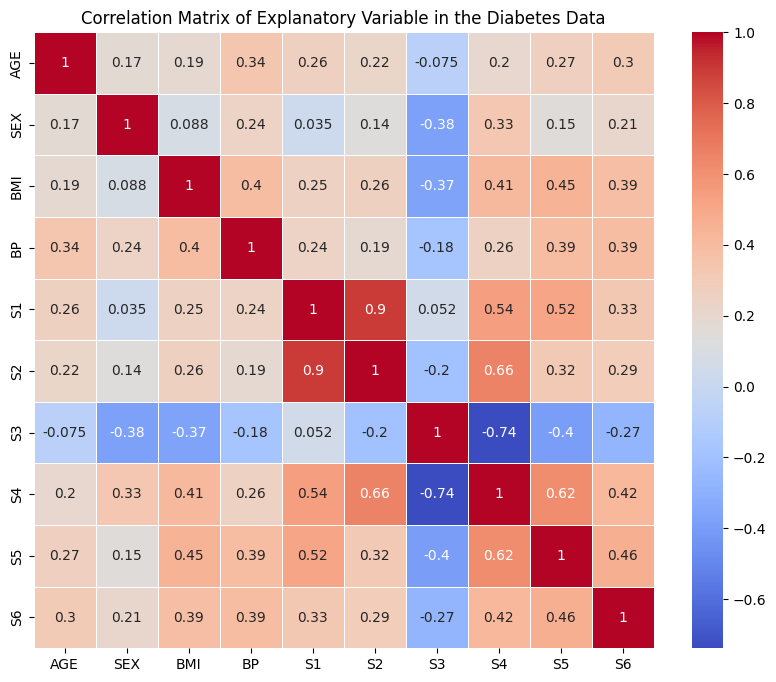

In [6]:
# Generate the heatmap from the correlation matrix

peaceplt.figure(figsize=(10, 8))
peacesns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
peaceplt.title('Correlation Matrix of Explanatory Variable in the Diabetes Data')
peaceplt.show()

**3.3 Build a Multivariate Linear Model, Calculate the Mean Squared Error and adjusted R-squared**

In [7]:
X = df_diabetes_explanatory
y = df_diabetes['Y']

X = peacestats.add_constant(X)

model = peacestats.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.83e-62
Time:                        19:26:55   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

In [8]:
mse = mean_squared_error(y, model.fittedvalues)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2859.6963475867506


In [9]:
adjusted_r_squared = model.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.5065592904853231


**3.5 Use function stepwise to interactively compose a model using forward selection**

In [10]:
# Implement stepwise selection using the statsmodels library.

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()

sfs_forward = SequentialFeatureSelector(lin_reg, n_features_to_select="auto", direction='forward', cv=5)
sfs_forward.fit(X_train, y_train)

selected_features = X.columns[sfs_forward.get_support()]
print("Selected Features by Forward Selection are: ", selected_features)

Selected Features by Forward Selection are:  Index(['SEX', 'BMI', 'BP', 'S1', 'S5'], dtype='object')


In [11]:
# Fit a model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
lin_reg.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_selected)

In [12]:
mse_forward = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Forward Selection): {mse_forward}')

r_squared_forward = lin_reg.score(X_test_selected, y_test)
print(f'R-squared (Forward Selection): {r_squared_forward}')

Mean Squared Error (Forward Selection): 3527.7641198416377
R-squared (Forward Selection): 0.31204868953765896


**QUESTION 4 - ANALYZING THE TITANIC DATASET**

**4.2 Probability of survival for a passenger on the titanic**

In [13]:
df_titanic = peacepd.read_csv('titanic3.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
# Calculate the probability of survival for a passenger on the titanic

probability_survival = df_titanic['survived'].mean()
print(f'Probability of Survival: {probability_survival}')

Probability of Survival: 0.3819709702062643


**4.3 Survival Probabilities by passenger class, gender and age.**

In [15]:
# Table of survival probabilities by passenger class, gender, and age.

bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

df_titanic['AgeGroups'] = peacepd.cut(df_titanic['age'], bins=bins, labels=labels)

survival_table = df_titanic.groupby(['pclass', 'sex', 'AgeGroups'])['survived'].mean().unstack()
print(survival_table)

AgeGroups         Child  Teenager  Young Adult     Adult    Senior
pclass sex                                                        
1      female  0.000000  1.000000     0.971429  0.977273  0.833333
       male    1.000000  0.500000     0.406250  0.312500  0.066667
2      female  1.000000  0.875000     0.893939  0.812500       NaN
       male    1.000000  0.000000     0.097087  0.035714  0.166667
3      female  0.466667  0.607143     0.451220  0.272727  1.000000
       male    0.342857  0.081081     0.174274  0.064516  0.000000


<ipython-input-15-ba7502a77b25>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_table = df_titanic.groupby(['pclass', 'sex', 'AgeGroups'])['survived'].mean().unstack()


**4.4 Logistic Regression Model for survival rates based on passenger class, sex and age.**

In [33]:
df_titanic['sex'] = LabelEncoder().fit_transform(df_titanic['sex'])
df_titanic = df_titanic.dropna(subset=['pclass', 'sex', 'age', 'survived'])

X = df_titanic[['pclass', 'sex', 'age']]
y = df_titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

print("Parameter Estimates", logistic_regression.coef_)

Parameter Estimates [[-1.24275382 -2.38830536 -0.03334353]]


In [34]:
# Check Statistical Significance of Parameters

X_train_sm = peacestats.add_constant(X_train)

model = peacestats.Logit(y_train, X_train_sm).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.460459
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  836
Model:                          Logit   Df Residuals:                      832
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.3131
Time:                        19:47:03   Log-Likelihood:                -384.94
converged:                       True   LL-Null:                       -560.38
Covariance Type:            nonrobust   LLR p-value:                 9.701e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7932      0.462     10.378      0.000       3.888       5.698
pclass        -1.2778      0.

**4.5 Model Performance measured by Classification Accuracy**

In [35]:
# Evaluate Model Performance with Confusion Matrix and Classification Accuracy
y_pred = logistic_regression.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')

Confusion Matrix:
[[98 14]
 [30 68]]
Classification Accuracy: 0.7904761904761904


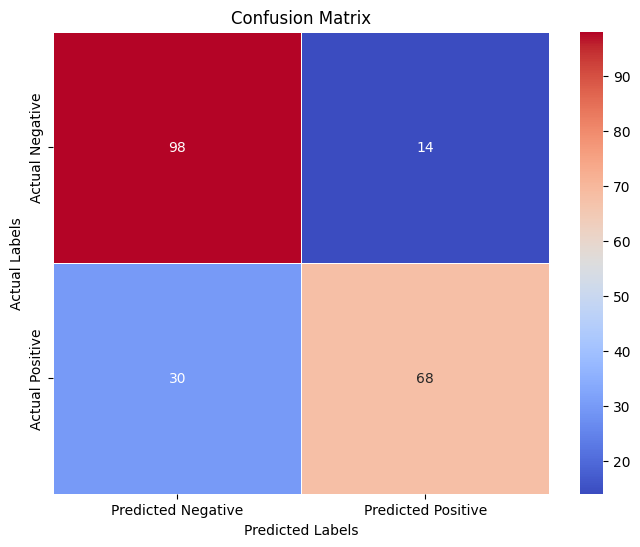

In [36]:
peaceplt.figure(figsize=(8, 6))
peacesns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
peaceplt.title('Confusion Matrix')
peaceplt.xlabel('Predicted Labels')
peaceplt.ylabel('Actual Labels')
peaceplt.show()